In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.dates as mdates
from matplotlib.offsetbox import AnchoredText
#import time
#now = time.strftime('%d%m%Y%H%M%S')
from datetime import datetime

In [2]:
# get https://www.canada.ca/en/public-health/services/diseases/2019-novel-coronavirus-infection.html#a1 csv
ca_numtotal = pd.read_csv('covid19.csv', usecols=['prname', 'date', 'numtotal', 'numtoday'])

In [3]:
qc_num = ca_numtotal[ca_numtotal['prname']=='Quebec']
qc_num = qc_num.reset_index(level=0, drop=True)
qc_num['date'] = pd.to_datetime(qc_num['date'], format='%d/%m/%Y')
qc_num = qc_num[-30:]
qc_num_ave = qc_num['numtoday'][-7:].sum() / len(qc_num['numtoday'][-7:])
qc_num_ave = qc_num_ave.astype(int)

In [4]:
qc_num['sma_5day'] = qc_num.iloc[:,3].rolling(window=5).mean()
qc_num['sma_7day'] = qc_num.iloc[:,3].rolling(window=7).mean()
qc_num = qc_num.reset_index(level=0, drop=True)

In [5]:
qc_num = qc_num[-23:]
qc_num = qc_num.reset_index(level=0, drop=True)

In [6]:
qc_num.to_csv('qc_num.csv')

In [7]:
qc_dates_mav = qc_num['date'].values
qc_mavg_5day = qc_num['sma_5day'].values
qc_mavg_7day = qc_num['sma_7day'].values
qc_mavg_5day = qc_mavg_5day.astype(int)
qc_mavg_7day = qc_mavg_7day.astype(int)

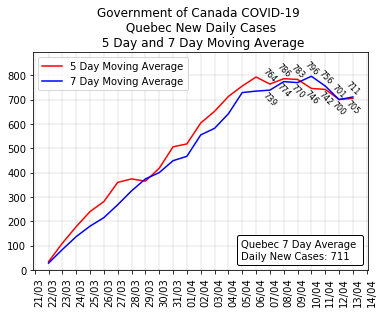

In [12]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.

#xfmt = mdates.DateFormatter('%d/%m/%y')
xfmt = mdates.DateFormatter('%d/%m')
ax.xaxis.set_major_formatter(xfmt)

locator = MaxNLocator(nbins=25) # with 14 bins you will have 13 ticks
ax.xaxis.set_major_locator(locator)

plt.xticks(rotation=90, va='top', ha='left', fontsize=10)
ax.grid(color='grey', linestyle='-', linewidth=0.2)
ax.plot(qc_dates_mav, qc_mavg_5day, color='red', label='5 Day Moving Average')  # Plot some data on the axes.
ax.plot(qc_dates_mav, qc_mavg_7day, color='blue', label='7 Day Moving Average')  # Plot some data on the axes.

ax.annotate(str(qc_mavg_5day[-1]),xy=(qc_dates_mav[-1],qc_mavg_5day[-1]), horizontalalignment='center', verticalalignment='top', rotation=-45,  fontsize=8)
ax.annotate(str(qc_mavg_5day[-2]),xy=(qc_dates_mav[-2],qc_mavg_5day[-2]), horizontalalignment='center', verticalalignment='bottom', rotation=-45,  fontsize=8)
ax.annotate(str(qc_mavg_5day[-3]),xy=(qc_dates_mav[-3],qc_mavg_5day[-3]), horizontalalignment='center', verticalalignment='top', rotation=-45,  fontsize=8)
ax.annotate(str(qc_mavg_5day[-4]),xy=(qc_dates_mav[-4],qc_mavg_5day[-4]), horizontalalignment='center', verticalalignment='top', rotation=-45,  fontsize=8)
ax.annotate(str(qc_mavg_5day[-5]),xy=(qc_dates_mav[-5],qc_mavg_5day[-5]), horizontalalignment='center', verticalalignment='bottom', rotation=-45,  fontsize=8)
ax.annotate(str(qc_mavg_5day[-6]),xy=(qc_dates_mav[-6],qc_mavg_5day[-6]), horizontalalignment='center', verticalalignment='bottom', rotation=-45,  fontsize=8)
ax.annotate(str(qc_mavg_5day[-7]),xy=(qc_dates_mav[-7],qc_mavg_5day[-7]), horizontalalignment='center', verticalalignment='bottom', rotation=-45,  fontsize=8)

ax.annotate(str(qc_mavg_7day[-1]),xy=(qc_dates_mav[-1],qc_mavg_7day[-1]), horizontalalignment='center', verticalalignment='bottom', rotation=-45, fontsize=8)
ax.annotate(str(qc_mavg_7day[-2]),xy=(qc_dates_mav[-2],qc_mavg_7day[-2]), horizontalalignment='center', verticalalignment='top', rotation=-45, fontsize=8)
ax.annotate(str(qc_mavg_7day[-3]),xy=(qc_dates_mav[-3],qc_mavg_7day[-3]), horizontalalignment='center', verticalalignment='bottom', rotation=-45, fontsize=8)
ax.annotate(str(qc_mavg_7day[-4]),xy=(qc_dates_mav[-4],qc_mavg_7day[-4]), horizontalalignment='center', verticalalignment='bottom', rotation=-45, fontsize=8)
ax.annotate(str(qc_mavg_7day[-5]),xy=(qc_dates_mav[-5],qc_mavg_7day[-5]), horizontalalignment='center', verticalalignment='top', rotation=-45, fontsize=8)
ax.annotate(str(qc_mavg_7day[-6]),xy=(qc_dates_mav[-6],qc_mavg_7day[-6]), horizontalalignment='center', verticalalignment='top', rotation=-45, fontsize=8)
ax.annotate(str(qc_mavg_7day[-7]),xy=(qc_dates_mav[-7],qc_mavg_7day[-7]), horizontalalignment='center', verticalalignment='top', rotation=-45, fontsize=8)

plt.title('Government of Canada COVID-19 \n Quebec New Daily Cases \n 5 Day and 7 Day Moving Average')
plt.savefig('GOC_Canada_covid-19_Quebec_MovingAverage.png')

at = AnchoredText('Quebec 7 Day Average \nDaily New Cases: ' + str(qc_num_ave),
                  prop=dict(size=10), frameon=True,
                  loc='lower right',
                  )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(at)

plt.legend(loc='upper left')

plt.ylim(0, qc_num['sma_5day'].max()+100)
plt.show()

In [9]:
qc_num['sma_5day'][-7:]

16    764.4
17    786.0
18    783.0
19    746.6
20    742.4
21    701.2
22    705.2
Name: sma_5day, dtype: float64

In [10]:
qc_num['sma_7day'][-7:]

16    739.714286
17    774.285714
18    770.571429
19    796.571429
20    756.428571
21    700.285714
22    711.000000
Name: sma_7day, dtype: float64